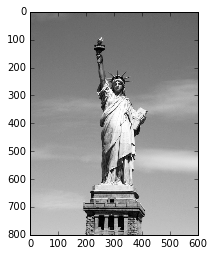

In [53]:
%matplotlib inline

from PIL import Image
from scipy import ndimage, misc
import io, cStringIO

import urllib2, urllib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

matplotlib.rcParams["figure.figsize"] = (15.0,7.5)


# misc.imresize
# ndimage.filters.gaussian_filter

# fd = urllib2.urlopen("http://www.excelbridge.com/wp-content/uploads/2014/12/image.png")
# fd = urllib2.urlopen("http://www.factslides.com/imgs/s-Einstein.png")
fd = urllib2.urlopen("https://lh4.googleusercontent.com/g1PaWwGvDeKpvJnoOeWJUu_jAXesl19y0iw70zeY2zENhe--0OTqHpz6z9J_V9wPEIJLzakPp8coHMQ=w1242-h968")

# read the image file in a numpy array
img_l = plt.imread(fd)


# url='http://www.mendaily.com/wp-content/uploads/2012/10/Petronas-Towers-Kuala-Lumpur-Malaysia.jpg'
# img_l = Image.open(cStringIO.StringIO(urllib2.urlopen(url).read()))
# plt.imshow(img_l, cmap='Greys_r')
# plt.show()

# Creating a grayscale array from image 
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = ((0.2989 * r + 0.5870 * g + 0.1140 * b ) * 255)//1 # For 0-255
    gray = (0.2989 * r + 0.5870 * g + 0.1140 * b ) # For 0-1

    return gray
# end rgb2gray

def differentiate_x(layer):
    height = len(layer)
    width = len(layer[0])
    output_layer = np.zeros((height, width)) 
    
    for y in range(height):
        for x in range(width-1):
            output_layer[y][x] = layer[y][x+1] - layer[y][x] 
    return output_layer

def differentiate_y(layer):
    height = len(layer)
    width = len(layer[0])
    output_layer = np.zeros((height, width)) 
    
    for y in range(height-1):
        for x in range(width):
            output_layer[y][x] = layer[y+1][x] - layer[y][x] 
    return output_layer


img_l = rgb2gray(img_l)

plt.imshow(img_l, cmap='Greys_r')
plt.show()


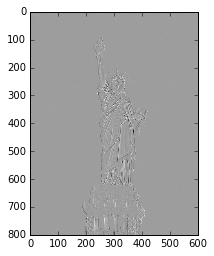

array([[ 0.00784236,  0.        , -0.00784236, ...,  0.        ,
        -0.00392118,  0.        ],
       [ 0.00784233,  0.00392121, -0.00392121, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00784236,  0.00784236,  0.        , ...,  0.00392118,
         0.        ,  0.        ],
       ..., 
       [ 0.00392121,  0.        , -0.00784236, ...,  0.00112981,
         0.        ,  0.        ],
       [ 0.00784236,  0.        , -0.00392121, ...,  0.00112981,
         0.00392115,  0.        ],
       [ 0.01176345,  0.00784236, -0.00392115, ...,  0.00112981,
         0.        ,  0.        ]])

In [54]:
plt.imshow(differentiate_x(img_l), cmap='Greys_r')
plt.show()

differentiate_x(img_l)

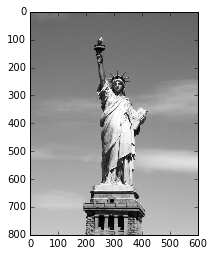

array([[ 0.37647059,  0.38431373,  0.38431373, ...,  0.29803922,
         0.29803922,  0.29411765],
       [ 0.36862745,  0.37647059,  0.38039216, ...,  0.29803922,
         0.29803922,  0.29803922],
       [ 0.36078431,  0.36862745,  0.37647059, ...,  0.30588235,
         0.30980392,  0.30980392],
       ..., 
       [ 0.65098039,  0.65490196,  0.65490196, ...,  0.63137255,
         0.63137255,  0.63137255],
       [ 0.64705882,  0.65490196,  0.65490196, ...,  0.63921569,
         0.63921569,  0.64313725],
       [ 0.63921569,  0.65098039,  0.65882353, ...,  0.63137255,
         0.63137255,  0.63137255]])

In [55]:
# resize the image 
img_l = (misc.imresize(img_l,1.0/1.0))
img_l = img_l/255.0

# resize the image 
img_m = misc.imresize(img_l,1.0/1.25)
img_m = img_m/255.0

# resize the image again
img_s = misc.imresize(img_m, 1.0/1.25)
img_s = img_s/255.0

plt.imshow(img_l, cmap='Greys_r')
plt.show()

img_l


In [56]:
k = 2**(1.0/5.0)
g_a = 1
g_b = 1*k
g_c = 1*k**2
g_d = 1*k**3
g_e = 1*k**4

# Create Gaussian blur layers
img_s_blur = [None] * 5
img_s_blur[0] = ndimage.filters.gaussian_filter(img_s,g_a)
img_s_blur[1] = ndimage.filters.gaussian_filter(img_s,g_b)
img_s_blur[2] = ndimage.filters.gaussian_filter(img_s,g_c)
img_s_blur[3] = ndimage.filters.gaussian_filter(img_s,g_d)
img_s_blur[4] = ndimage.filters.gaussian_filter(img_s,g_e)

img_m_blur = [None] * 5
img_m_blur[0] = ndimage.filters.gaussian_filter(img_m,g_a)
img_m_blur[1] = ndimage.filters.gaussian_filter(img_m,g_b)
img_m_blur[2] = ndimage.filters.gaussian_filter(img_m,g_c)
img_m_blur[3] = ndimage.filters.gaussian_filter(img_m,g_d)
img_m_blur[4] = ndimage.filters.gaussian_filter(img_m,g_e)

img_l_blur = [None] * 5
img_l_blur[0] = ndimage.filters.gaussian_filter(img_l,1)
img_l_blur[1] = ndimage.filters.gaussian_filter(img_l,2)
img_l_blur[2] = ndimage.filters.gaussian_filter(img_l,3)
img_l_blur[3] = ndimage.filters.gaussian_filter(img_l,4)
img_l_blur[4] = ndimage.filters.gaussian_filter(img_l,5)

# Create DoG layers
img_s_dog = [None] * 4
img_s_dog[0] = img_s_blur[1] - img_s_blur[0]
img_s_dog[1] = img_s_blur[2] - img_s_blur[1]
img_s_dog[2] = img_s_blur[3] - img_s_blur[2]
img_s_dog[3] = img_s_blur[4] - img_s_blur[3]

img_m_dog = [None] * 4
img_m_dog[0] = img_m_blur[1] - img_m_blur[0]
img_m_dog[1] = img_m_blur[2] - img_m_blur[1]
img_m_dog[2] = img_m_blur[3] - img_m_blur[2]
img_m_dog[3] = img_m_blur[4] - img_m_blur[3]

img_l_dog = [None] * 4
img_l_dog[0] = img_l_blur[1] - img_l_blur[0]
img_l_dog[1] = img_l_blur[2] - img_l_blur[1]
img_l_dog[2] = img_l_blur[3] - img_l_blur[2]
img_l_dog[3] = img_l_blur[4] - img_l_blur[3]

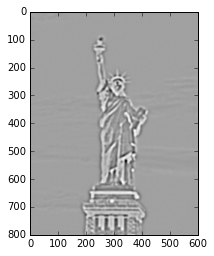

In [57]:

plt.imshow(img_l_dog[3], cmap='Greys_r')
plt.show()

In [58]:
img_l_dog[3]

array([[-0.00078654, -0.00090098, -0.00110708, ...,  0.00135972,
         0.00146692,  0.00152089],
       [-0.00070449, -0.000818  , -0.00102227, ...,  0.0013074 ,
         0.00141054,  0.00146238],
       [-0.00054813, -0.00066052, -0.00086253, ...,  0.001214  ,
         0.00131044,  0.00135879],
       ..., 
       [ 0.00140094,  0.00131453,  0.00115647, ...,  0.0017322 ,
         0.00184538,  0.00190615],
       [ 0.00150241,  0.00141726,  0.00126198, ...,  0.00200495,
         0.00211579,  0.00217507],
       [ 0.00155573,  0.00147133,  0.00131766, ...,  0.00214971,
         0.00225927,  0.00231773]])

In [59]:
from numpy.linalg import inv

def return_extrema(dog_set, img):
    extrema_x = []
    extrema_y = []
    print "xrange: ", len(dog_set[0])
    print "yrange: ", len(dog_set[0][0])

    # ITERATE OVER THE ALL INTERNAL BLUR LEVELS OF IMAGE
    for dog_level in range(1,3):
        # GENERATE THE DIFFERENTIATED IMAGES
        dx = differentiate_x(dog_set[dog_level])
        dy = differentiate_y(dog_set[dog_level])
        dxx = differentiate_x(dx)
        dyy = differentiate_y(dy)
        dxy = differentiate_y(dx)
        
        # ITERATE OVER EACH BLUR LEVEL
        for y in range(1, len((dog_set[0])) - 1):
            for x in range(1, (len(dog_set[0][0])) - 1):
                
                curr_x = x
                curr_y = y
                
                # x,y coordinates of center of the 3x3 square
                max_v = -100000
                min_v =  100000                                                                                                                                                            
                for lvl in range(-1,2): # compare level below, current level and level above
                    for sq_y in range(-1,2): 
                        for sq_x in range(-1,2):                        
                            if not(lvl == 0 and sq_y == 0 and sq_x == 0):
                                # if any of the other points are equal, then it is not an extrema
                                if dog_set[dog_level + lvl][y+sq_y][x+sq_x] < min_v: 
                                    min_v = dog_set[dog_level + lvl][y+sq_y][x+sq_x]
                                if dog_set[dog_level + lvl][y+sq_y][x+sq_x] > max_v:
                                    max_v = dog_set[dog_level + lvl][y+sq_y][x+sq_x]
                
                # POTENTIAL EXTREMUM
                if dog_set[dog_level][curr_y][curr_x] > max_v or dog_set[dog_level][curr_y][curr_x] < min_v:
                    # MOVE EXTREMUM TO ACTUAL LOCATION
                    a = -1.0 * inv(np.matrix(((dxx[curr_y][curr_x],dxy[curr_y][curr_x],),(dxy[curr_y][curr_x],dyy[curr_y][curr_x],))))
                    b = np.matrix(((dx[curr_y][curr_x],),(dy[curr_y][curr_x],)))
                    x_hat =  np.dot( a , b )
                        
#                         print "x_hat"
#                         print x_hat
                        
                    if( abs(float(x_hat[0])) < 0.5 and abs(float(x_hat[1])) < 0.5 ):
#                             break
                        do_nothing = 0
                    elif( float(x_hat[0]) > 0.5 ):
                        curr_x += 1
                    elif( float(x_hat[0]) < -0.5 ): 
                        curr_x -= 1
                    elif( float(x_hat[1]) > 0.5 ): 
                        curr_y += 1
                    elif( float(x_hat[1]) < -0.5 ): 
                        curr_y -= 1
                    
                    # VERIFY IF LOW CONTRAST
                    lcv = dog_set[dog_level][curr_y][curr_x] + 0.5*np.dot( np.matrix(( dx[curr_y][curr_x], dy[curr_y][curr_x] )) , x_hat )
#                     print "low contrast value: ", lcv
                    if( lcv > 0.03 ):
                        # VERIFY IF EDGE EXTREMUM
                        ev = ((dxx[curr_y][curr_x] + dyy[curr_y][curr_x])**2)/(dxx[curr_y][curr_x]*dyy[curr_y][curr_x] - dxy[curr_y][cur]**2)
                        print ev
                        if ev < 12.1:
                            # HIGH CONTRAST, CORNER EXTREMUM
                            extrema_x.append(x)
                            extrema_y.append(y)
                        
                            return (extrema_x, extrema_y)

In [60]:
a = np.matrix(((2,),(1,)))
b = np.matrix(((13,),(9,)))

c = np.dot(a.transpose() ,b)
c


matrix([[35]])

xrange:  512
yrange:  384
-3.6440920573


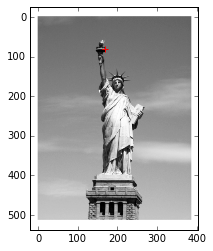

[168]
[80]


In [61]:
(ex_x_s, ex_y_s) = return_extrema(img_s_dog, img_s)

plt.imshow(img_s, cmap='Greys_r')
plt.scatter(ex_x_s,ex_y_s, marker='+', color="red", s=40)
plt.show()

print ex_x_s
print ex_y_s

xrange:  640
yrange:  480
-5.83720083845


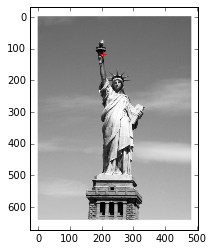

[204]
[118]


In [62]:
(ex_x_m, ex_y_m) = return_extrema(img_m_dog, img_m)

plt.imshow(img_m, cmap='Greys_r')
plt.scatter(ex_x_m,ex_y_m, marker='+', color="red", s=40)
plt.show()

print ex_x_m
print ex_y_m

xrange:  800
yrange:  600
-3.14807189605


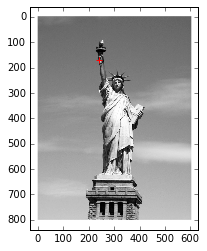

[240]
[169]


In [63]:
(ex_x_l, ex_y_l) = return_extrema(img_l_dog, img_l)

plt.imshow(img_l, cmap='Greys_r')
plt.scatter(ex_x_l,ex_y_l, marker='+', color="red", s=40)
plt.show()

print ex_x_l
print ex_y_l